In [1]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
import pandas as pd
df = pd.read_csv("forestfires.csv")
df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.drop(["month","day"],axis=1,inplace = True)

In [4]:

#count the number of value repeated
df["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [5]:

df.loc[df["size_category"]=='small','size_category']=0
df.loc[df["size_category"]=='large','size_category']=1
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [6]:
X = df.iloc[:,0:28]
Y = df.iloc[:,28]

In [7]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X = SS.fit_transform(X)

In [8]:
import numpy as np
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)


In [9]:
model = Sequential()
model.add(Dense(42, input_dim=28,  activation='relu')) #input layer
model.add(Dense(42, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) #output layer

In [10]:
model.compile(loss='hinge', optimizer='adam',metrics=['accuracy'])

In [11]:

history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=8)

Epoch 1/150
44/44 [==============================] - 1s 8ms/step - loss: 1.2513 - accuracy: 0.5000 - val_loss: 1.1071 - val_accuracy: 0.6784
Epoch 2/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0848 - accuracy: 0.7572 - val_loss: 1.0378 - val_accuracy: 0.6784
Epoch 3/150
44/44 [==============================] - 0s 3ms/step - loss: 1.0318 - accuracy: 0.7572 - val_loss: 1.0176 - val_accuracy: 0.6784
Epoch 4/150
44/44 [==============================] - 0s 3ms/step - loss: 1.0167 - accuracy: 0.7572 - val_loss: 1.0109 - val_accuracy: 0.6784
Epoch 5/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0105 - accuracy: 0.7572 - val_loss: 1.0077 - val_accuracy: 0.6784
Epoch 6/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0073 - accuracy: 0.7572 - val_loss: 1.0057 - val_accuracy: 0.6784
Epoch 7/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0055 - accuracy: 0.7572 - val_loss: 1.0044 - val_accuracy: 0.6784
Epoch 8/150
4

In [13]:
model.evaluate(X,Y)

17/17 [==============================] - 0s 2ms/step - loss: 0.8277 - accuracy: 0.9014


[0.8277297019958496, 0.9013539552688599]

In [15]:
model = Sequential()
model.add(Dense(100,activation = 'relu',input_shape = (28,)))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [17]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['Accuracy'])

In [21]:
model_ann = model.fit(X,Y,epochs = 100)
model_ann

Epoch 1/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0073 - Accuracy: 0.9981
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0058 - Accuracy: 1.0000
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0046 - Accuracy: 1.0000
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0042 - Accuracy: 1.0000
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0040 - Accuracy: 1.0000
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0039 - Accuracy: 1.0000
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0037 - Accuracy: 1.0000
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0037 - Accuracy: 1.0000
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0036 - Accuracy: 1.0000
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0035 - Accuracy: 1.0000
Epoch 11/

In [19]:
model.evaluate(X,Y)

17/17 [==============================] - 0s 2ms/step - loss: 0.0043 - Accuracy: 1.0000


[0.0042585511691868305, 1.0]

Text(0, 0.5, 'Accuracy')

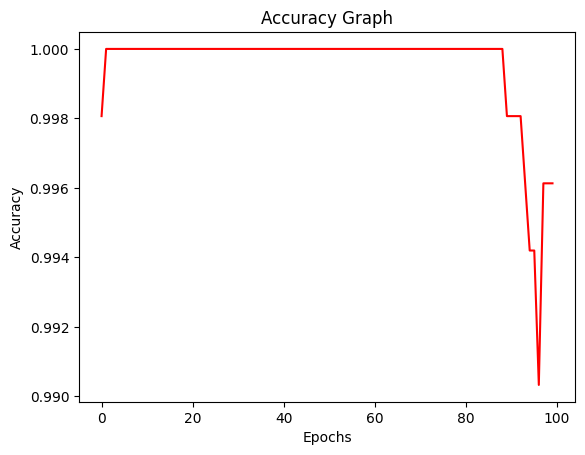

In [26]:
#Accuracy Graph
import matplotlib.pyplot as plt
plt.plot(model_ann.history['Accuracy'],'r')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

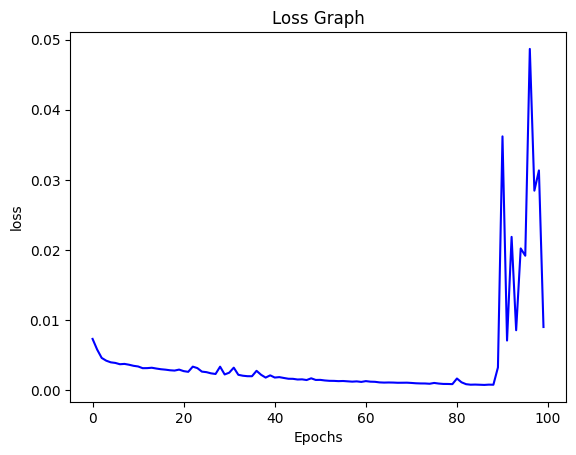

In [29]:
#Loss Graph
import matplotlib.pyplot as plt
plt.plot(model_ann.history['loss'],'b')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [35]:
X1 = model.predict(X)
X1
X2 = []
for element in X1:
  if element > 0.5:
    X2.append(1)
  else:
    X2.append(0)

17/17 [==============================] - 0s 1ms/step


In [38]:
#classifcation report
from sklearn.metrics import classification_report
print(classification_report(X2,Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       139

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



array([[-8.0595946e-01, -1.3233255e+00, -1.8304768e+00, ...,
        -4.4022545e-02, -1.7285971e-01, -7.0608127e-01],
       [-8.1020342e-03, -1.1795408e+00,  4.8889092e-01, ...,
        -4.4022545e-02,  5.7850380e+00, -7.0608127e-01],
       [-8.1020342e-03, -1.0498219e+00,  5.6071544e-01, ...,
        -4.4022545e-02,  5.7850380e+00, -7.0608127e-01],
       ...,
       [-1.6400832e+00, -8.4664774e-01,  4.7476810e-01, ...,
        -4.4022545e-02, -1.7285971e-01, -7.0608127e-01],
       [ 6.8095666e-01,  5.4900253e-01,  2.6938221e-01, ...,
        -4.4022545e-02, -1.7285971e-01, -7.0608127e-01],
       [-2.0208788e+00, -1.6859133e+00, -1.7804416e+00, ...,
         2.2715633e+01, -1.7285971e-01, -7.0608127e-01]], dtype=float32)